In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

isernia it
ilulissat gl
te anau nz
atuona pf
mahebourg mu
bilibino ru
mataura pf
totness sr
bambous virieux mu
albany au
rikitea pf
barentsburg sj
taolanaro mg
kapaa us
ilulissat gl
lazaro cardenas mx
tabou ci
torbay ca
mataura pf
busselton au
toamasina mg
punta arenas cl
belushya guba ru
margate za
port alfred za
hithadhoo mv
vaini to
punta arenas cl
new norfolk au
mataura pf
eureka us
taolanaro mg
qaanaaq gl
bethel us
new norfolk au
maridi sd
puerto ayora ec
nikolskoye ru
port alfred za
nichinan jp
baruun-urt mn
grand river south east mu
lagoa pt
coihaique cl
whitehorse ca
punta arenas cl
kahului us
vaini to
rikitea pf
palabuhanratu id
east london za
puerto ayora ec
brae gb
cabo san lucas mx
zinder ne
ucluelet ca
rikitea pf
yafran ly
nemuro jp
naze jp
kavieng pg
lebu cl
punta arenas cl
talnakh ru
kuching my
bathsheba bb
taolanaro mg
khatanga ru
limon cr
mataura pf
vaini to
butaritari ki
cape town za
gurgan az
matola mz
bilma ne
vaini to
provideniya ru
tabuk sa
kieta pg
asau tv
hobart

vaini to
longyearbyen sj
qingdao cn
belushya guba ru
qaanaaq gl
hilo us
albany au
thompson ca
grand river south east mu
bredasdorp za
hofn is
necochea ar
reutte at
portel br
zachagansk kz
cayenne gf
port macquarie au
goderich sl
sorland no
veraval in
vaini to
muskegon us
kaitangata nz
saskylakh ru
grand gaube mu
cape town za
sorada in
barrow us
bababe mr
mataura pf
coromandel nz
bredasdorp za
sambek ru
kaitangata nz
luderitz na
tasiilaq gl
pevek ru
pevek ru
hilo us
pevek ru
castro cl
baghmara in
atar mr
hilo us
turukhansk ru
yulara au
hithadhoo mv
tucurui br
qaanaaq gl
kazlu ruda lt
mbeya tz
hermanus za
cobija bo
bure et
qaanaaq gl
mount gambier au
rikitea pf
jamestown sh
tashtagol ru
carutapera br
sokoni tz
naze jp
suntar ru
toliary mg
rikitea pf
rikitea pf
kodiak us
barrow us
butaritari ki
kutum sd
grande-riviere ca
marau br
port alfred za
punta arenas cl
yellowknife ca
rosario ar
jak hu
yar-sale ru
vaini to
ushuaia ar
victoria sc
iralaya hn
ushuaia ar
kudahuvadhoo mv
punta arenas cl

hobart au
ushuaia ar
veraval in
kodiak us
souillac mu
sobolevo ru
souillac mu
sedelnikovo ru
cabo san lucas mx
port alfred za
cape town za
hobart au
port moresby pg
severo-kurilsk ru
kapaa us
rikitea pf
iberia pe
puerto ayora ec
mastic beach us
new norfolk au
alibag in
saint-philippe re
oriximina br
fairbanks us
mahebourg mu
kulhudhuffushi mv
wagar sd
isangel vu
alice town bs
saint-philippe re
port alfred za
niesky de
kapaa us
illoqqortoormiut gl
cape town za
hobart au
porto torres it
tlahualilo mx
palabuhanratu id
liwale tz
ancud cl
neuquen ar
kaka tm
belushya guba ru
rikitea pf
bac lieu vn
hasaki jp
bluff nz
taolanaro mg
bengkulu id
mataura pf
taolanaro mg
moose factory ca
richards bay za
harper lr
mnogovershinnyy ru
yellowknife ca
alice springs au
cape town za
ushuaia ar
bambous virieux mu
cape town za
ushuaia ar
rikitea pf
payo ph
sur om
atuona pf
barentsburg sj
tautira pf
alice springs au
portland au
khatanga ru
libreville ga
klaksvik fo
khatanga ru
codajas br
nome us
vaini to
ilu

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isernia
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | te anau
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | totness
Processing Record 9 of Set 1 | bambous virieux
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | lazaro cardenas
Processing Record 16 of Set 1 | tabou
Processing Record 17 of Set 1 | torbay
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | toamasina
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | belushya guba
City not found. Sk

Processing Record 38 of Set 4 | iisalmi
Processing Record 39 of Set 4 | krasnoselkup
Processing Record 40 of Set 4 | portland
Processing Record 41 of Set 4 | saint anthony
Processing Record 42 of Set 4 | kolosovka
Processing Record 43 of Set 4 | leningradskiy
Processing Record 44 of Set 4 | orange cove
Processing Record 45 of Set 4 | krasnoarmeysk
Processing Record 46 of Set 4 | esperance
Processing Record 47 of Set 4 | wasilla
Processing Record 48 of Set 4 | sychevka
Processing Record 49 of Set 4 | bukene
Processing Record 50 of Set 4 | pedernales
Processing Record 1 of Set 5 | santa cruz
Processing Record 2 of Set 5 | bam
Processing Record 3 of Set 5 | coari
Processing Record 4 of Set 5 | ayni
Processing Record 5 of Set 5 | labytnangi
Processing Record 6 of Set 5 | arraial do cabo
Processing Record 7 of Set 5 | meadow lake
Processing Record 8 of Set 5 | cap malheureux
Processing Record 9 of Set 5 | hobyo
Processing Record 10 of Set 5 | marzuq
Processing Record 11 of Set 5 | ocala
Pro

Processing Record 26 of Set 8 | tucurui
Processing Record 27 of Set 8 | kazlu ruda
Processing Record 28 of Set 8 | mbeya
Processing Record 29 of Set 8 | cobija
Processing Record 30 of Set 8 | bure
Processing Record 31 of Set 8 | tashtagol
Processing Record 32 of Set 8 | sokoni
Processing Record 33 of Set 8 | toliary
City not found. Skipping...
Processing Record 34 of Set 8 | kutum
Processing Record 35 of Set 8 | grande-riviere
City not found. Skipping...
Processing Record 36 of Set 8 | marau
Processing Record 37 of Set 8 | rosario
Processing Record 38 of Set 8 | jak
Processing Record 39 of Set 8 | yar-sale
Processing Record 40 of Set 8 | victoria
Processing Record 41 of Set 8 | iralaya
Processing Record 42 of Set 8 | silver city
Processing Record 43 of Set 8 | waipawa
Processing Record 44 of Set 8 | caravelas
Processing Record 45 of Set 8 | novhorodka
Processing Record 46 of Set 8 | miranda
Processing Record 47 of Set 8 | kabare
Processing Record 48 of Set 8 | vila velha
Processing Rec

Processing Record 11 of Set 12 | zhezkazgan
Processing Record 12 of Set 12 | tambacounda
Processing Record 13 of Set 12 | spencer
Processing Record 14 of Set 12 | pascagoula
Processing Record 15 of Set 12 | pafos
Processing Record 16 of Set 12 | harper
Processing Record 17 of Set 12 | jiwani
Processing Record 18 of Set 12 | igrim
Processing Record 19 of Set 12 | corrales
Processing Record 20 of Set 12 | eldikan
City not found. Skipping...
Processing Record 21 of Set 12 | sorong
Processing Record 22 of Set 12 | oliveira
Processing Record 23 of Set 12 | yinchuan
Processing Record 24 of Set 12 | sao paulo de olivenca
Processing Record 25 of Set 12 | nagato
Processing Record 26 of Set 12 | truro
Processing Record 27 of Set 12 | nedjo
Processing Record 28 of Set 12 | taft
Processing Record 29 of Set 12 | biak
Processing Record 30 of Set 12 | beyneu
Processing Record 31 of Set 12 | okhotsk
Processing Record 32 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 33 of Set 12 | 

In [8]:
len(city_data)

575

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Isernia,41.6002,14.2382,43.00,93,100,4.94,IT,2021-01-07 18:29:20
1,Ilulissat,69.2167,-51.1000,12.20,79,90,19.57,GL,2021-01-07 18:32:37
2,Te Anau,-45.4167,167.7167,48.45,90,62,3.89,NZ,2021-01-07 18:30:46
3,Atuona,-9.8000,-139.0333,77.34,72,5,15.52,PF,2021-01-07 18:28:50
4,Mahebourg,-20.4081,57.7000,78.80,73,75,11.50,MU,2021-01-07 18:30:17
5,Bilibino,68.0546,166.4372,-14.98,86,100,2.01,RU,2021-01-07 18:32:37
6,Mataura,-46.1927,168.8643,52.00,80,31,1.99,NZ,2021-01-07 18:32:38
7,Totness,5.8833,-56.3167,81.68,78,73,12.68,SR,2021-01-07 18:32:38
8,Bambous Virieux,-20.3428,57.7575,78.80,73,75,11.50,MU,2021-01-07 18:32:38
9,Albany,42.6001,-73.9662,33.01,69,31,1.99,US,2021-01-07 18:29:39


In [10]:
# Reorder columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
reordered_city_data_df = city_data_df[new_column_order]
reordered_city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Isernia,IT,2021-01-07 18:29:20,41.6002,14.2382,43.00,93,100,4.94
1,Ilulissat,GL,2021-01-07 18:32:37,69.2167,-51.1000,12.20,79,90,19.57
2,Te Anau,NZ,2021-01-07 18:30:46,-45.4167,167.7167,48.45,90,62,3.89
3,Atuona,PF,2021-01-07 18:28:50,-9.8000,-139.0333,77.34,72,5,15.52
4,Mahebourg,MU,2021-01-07 18:30:17,-20.4081,57.7000,78.80,73,75,11.50
...,...,...,...,...,...,...,...,...,...
570,Alice Springs,AU,2021-01-07 18:34:56,-23.7000,133.8833,60.80,55,0,8.43
571,Sur,OM,2021-01-07 18:34:57,22.5667,59.5289,66.78,43,0,19.01
572,Libreville,GA,2021-01-07 18:34:57,0.3925,9.4537,82.40,78,40,5.75
573,Codajas,BR,2021-01-07 18:34:57,-3.8367,-62.0569,83.08,84,100,3.33


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

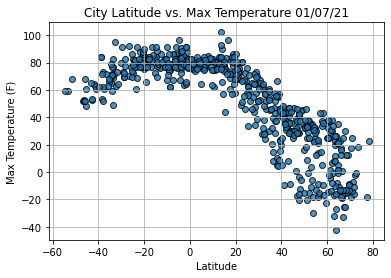

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

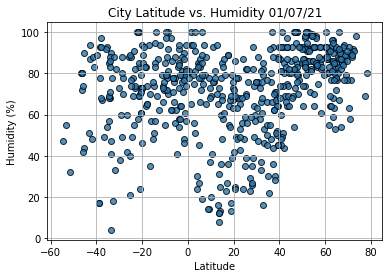

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

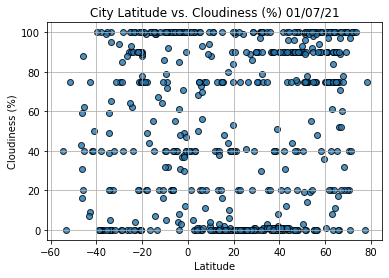

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

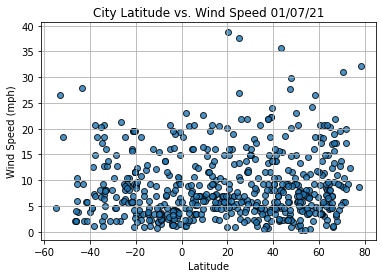

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()



In [18]:
index13 = city_data_df.loc[13]
index13
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Isernia,41.6002,14.2382,43.00,93,100,4.94,IT,2021-01-07 18:29:20
1,Ilulissat,69.2167,-51.1000,12.20,79,90,19.57,GL,2021-01-07 18:32:37
5,Bilibino,68.0546,166.4372,-14.98,86,100,2.01,RU,2021-01-07 18:32:37
7,Totness,5.8833,-56.3167,81.68,78,73,12.68,SR,2021-01-07 18:32:38
9,Albany,42.6001,-73.9662,33.01,69,31,1.99,US,2021-01-07 18:29:39


In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

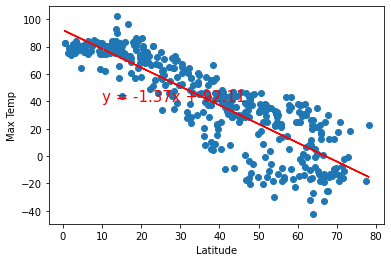

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression', 'Max Temp',(10,40))

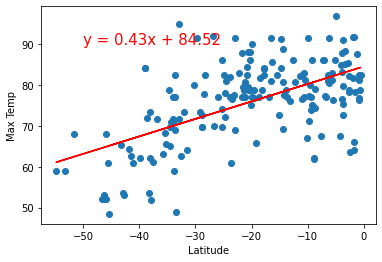

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

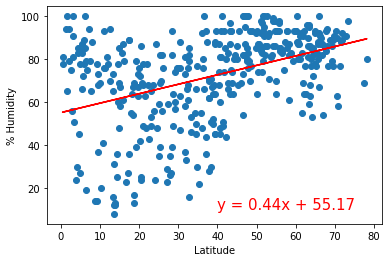

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

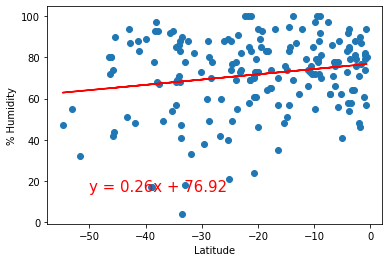

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

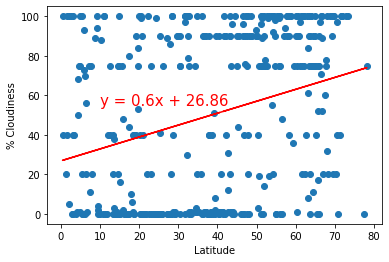

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemispherefor % Cloudiness', '% Cloudiness',(10,55))

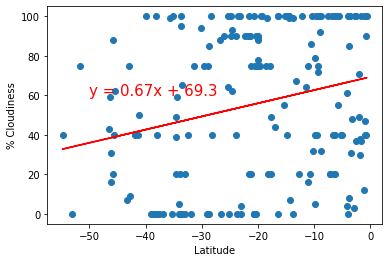

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemispherefor % Cloudiness', '% Cloudiness',(-50,60))

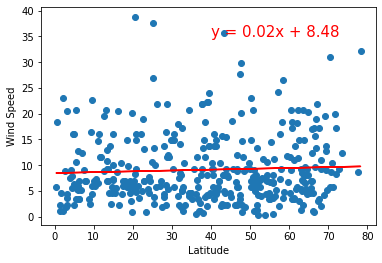

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

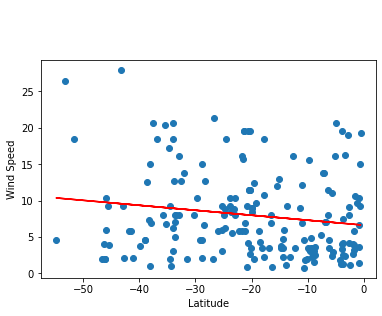

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))